<a href="https://colab.research.google.com/github/kirath2205/Neural-Network-Assignment-1/blob/pramurta/start_1a_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
import pandas as pd
import time
import numpy as np
import statistics

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Read Data

In [3]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df['label'].value_counts()

rock         100
jazz         100
reggae       100
metal        100
hiphop       100
disco        100
country      100
pop          100
classical    100
blues        100
Name: label, dtype: int64

#Question 1


In [5]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset_question1(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [6]:
X_train, y_train, X_test, y_test = prepare_dataset_question1(df, columns_to_drop, test_size=0.3, random_state=0)


In [7]:
def build_model(total_classes,input_shape,dropout_probability=0.3,optimizer='adam', number_of_hidden_neurons=64, number_of_hidden_layers = 1, include_dropout=True):

  model=tf.keras.models.Sequential()
  model.add(keras.layers.Input(shape=input_shape))

  for i in range(number_of_hidden_layers):
    model.add(keras.layers.Dense(number_of_hidden_neurons, activation="relu"))
    if include_dropout:
        model.add(keras.layers.Dropout(dropout_probability))
    
  model.add(keras.layers.Dense(total_classes, activation='softmax'))
  model.compile(optimizer=optimizer,metrics=['accuracy'],loss=keras.losses.SparseCategoricalCrossentropy())

  return model

def train_model(model,epochs,X_train,y_train,X_test,y_test,batch_size=1,callbacks=[]):
    
  history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test),callbacks=callbacks)
  return history


**Part A**

In [8]:
tf.keras.backend.clear_session()
history={}
model=build_model(total_classes = 10, input_shape = X_train[0].shape, number_of_hidden_neurons = 16)
history=train_model(model=model, epochs=50,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

Epoch 1/50
670/670 [==============================] - 2s 2ms/step - loss: 2.1514 - accuracy: 0.2657 - val_loss: 1.7140 - val_accuracy: 0.3758
Epoch 2/50
670/670 [==============================] - 1s 2ms/step - loss: 1.6287 - accuracy: 0.4149 - val_loss: 1.4741 - val_accuracy: 0.4818
Epoch 3/50
670/670 [==============================] - 1s 2ms/step - loss: 1.4563 - accuracy: 0.4746 - val_loss: 1.3438 - val_accuracy: 0.5333
Epoch 4/50
670/670 [==============================] - 1s 2ms/step - loss: 1.3540 - accuracy: 0.5015 - val_loss: 1.2565 - val_accuracy: 0.5727
Epoch 5/50
670/670 [==============================] - 1s 2ms/step - loss: 1.2562 - accuracy: 0.5373 - val_loss: 1.2078 - val_accuracy: 0.5727
Epoch 6/50
670/670 [==============================] - 1s 2ms/step - loss: 1.2100 - accuracy: 0.5776 - val_loss: 1.1531 - val_accuracy: 0.5879
Epoch 7/50
670/670 [==============================] - 1s 2ms/step - loss: 1.1551 - accuracy: 0.5791 - val_loss: 1.1170 - val_accuracy: 0.5939
Epoch 

**Part B**

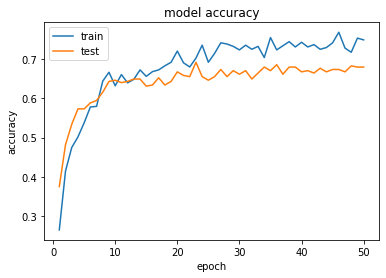

In [9]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**Part C**

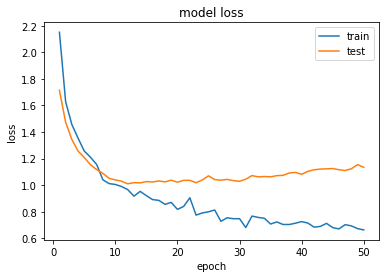

In [10]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#Question 2

**Part A**

In [11]:

from sklearn.model_selection import KFold
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)



# def prepare_dataset_question2(df, columns_to_drop):

#     label_encoder = preprocessing.LabelEncoder()
#     df['label'] = label_encoder.fit_transform(df['label'])

#     X = df.drop(columns_to_drop,axis=1)
#     Y = df['label'].to_numpy()

#     standard_scaler = preprocessing.StandardScaler()
#     X_scaled = standard_scaler.fit_transform(X)

#     return X_scaled,Y


In [ ]:
# X,y = prepare_dataset_question2(df, columns_to_drop)
# train_model(model,epochs,X_train,y_train,X_test,y_test,batch_size=1,callbacks=[]):

In [13]:
kf = KFold(n_splits=3)

batch_sizes = [1,4,8,16,32,64]
history = {}



k_fold = 1

for train_index, val_index in kf.split(X_train):
    X_training, X_val = X_train[train_index], X_train[val_index]
    y_training, y_val = y_train[train_index], y_train[val_index]
    for batch_size in batch_sizes:
        print('Model for batch size: '+str(batch_size)+" and k_fold: "+str(k_fold))
        model = build_model(total_classes = 10, input_shape = X_training[0].shape, number_of_hidden_neurons = 16)
        history[(k_fold,batch_size)] = train_model(model,50,X_training,y_training,X_val,y_val,batch_size=batch_size,callbacks=[])
    k_fold+=1

Model for batch size: 1 and k_fold: 1
Epoch 1/50
446/446 [==============================] - 1s 2ms/step - loss: 2.3141 - accuracy: 0.2040 - val_loss: 1.8358 - val_accuracy: 0.3839
Epoch 2/50
446/446 [==============================] - 1s 2ms/step - loss: 1.7965 - accuracy: 0.3498 - val_loss: 1.5823 - val_accuracy: 0.4598
Epoch 3/50
446/446 [==============================] - 1s 2ms/step - loss: 1.5692 - accuracy: 0.4462 - val_loss: 1.4586 - val_accuracy: 0.5268
Epoch 4/50
446/446 [==============================] - 1s 2ms/step - loss: 1.4215 - accuracy: 0.5135 - val_loss: 1.3434 - val_accuracy: 0.5312
Epoch 5/50
446/446 [==============================] - 1s 2ms/step - loss: 1.3129 - accuracy: 0.5291 - val_loss: 1.2578 - val_accuracy: 0.5714
Epoch 6/50
446/446 [==============================] - 1s 2ms/step - loss: 1.2604 - accuracy: 0.5583 - val_loss: 1.2352 - val_accuracy: 0.5714
Epoch 7/50
446/446 [==============================] - 1s 2ms/step - loss: 1.1781 - accuracy: 0.5919 - val_loss

In [15]:
mean_cross_val_accuracy = {}
num_epochs = 50
for batch_size in batch_sizes:
    mean_cross_val_accuracy[batch_size] = []


for batch_size in batch_sizes:
    for epoch in range(num_epochs):
        sum_for_3_folds = 0
        for kFold in [1,2,3]:
            sum_for_3_folds+=history[(kFold,batch_size)].history['val_accuracy'][epoch]
        mean_cross_val_accuracy[batch_size].append(sum_for_3_folds/3)


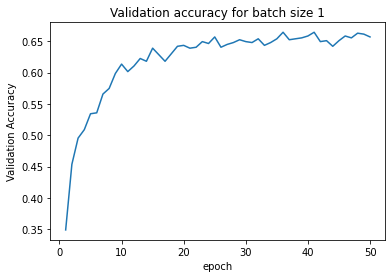

In [17]:
epochs=[x for x in range(1,51)]
plt.plot(epochs, mean_cross_val_accuracy[1])

plt.title('Validation accuracy for batch size 1')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')


plt.show()



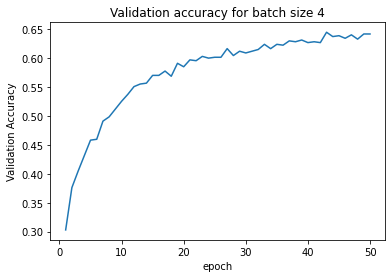

In [18]:
epochs=[x for x in range(1,51)]
plt.plot(epochs, mean_cross_val_accuracy[4])

plt.title('Validation accuracy for batch size 4')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')


plt.show()

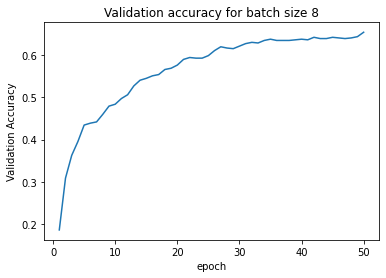

In [19]:
epochs=[x for x in range(1,51)]
plt.plot(epochs, mean_cross_val_accuracy[8])

plt.title('Validation accuracy for batch size 8')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')


plt.show()

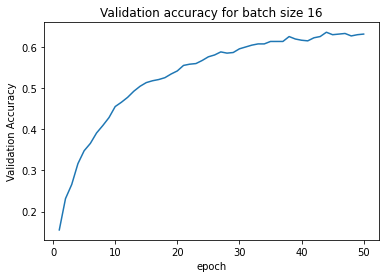

In [20]:
epochs=[x for x in range(1,51)]
plt.plot(epochs, mean_cross_val_accuracy[16])

plt.title('Validation accuracy for batch size 16')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')


plt.show()

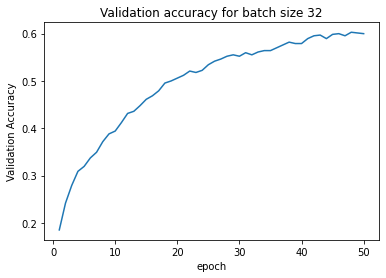

In [21]:
epochs=[x for x in range(1,51)]
plt.plot(epochs, mean_cross_val_accuracy[32])

plt.title('Validation accuracy for batch size 32')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')


plt.show()

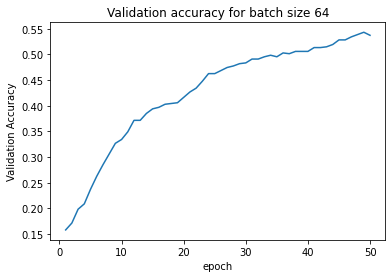

In [22]:
epochs=[x for x in range(1,51)]
plt.plot(epochs, mean_cross_val_accuracy[64])

plt.title('Validation accuracy for batch size 64')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')


plt.show()

**Part B**

In [60]:
kf = KFold(n_splits=3)
tf.keras.backend.clear_session()
batch_sizes = [1,4,8,16,32,64]
epoch_times = {}
history = {}


k_fold = 1

for train_index, val_index in kf.split(X_train):
    X_training, X_val = X_train[train_index], X_train[val_index]
    y_training, y_val = y_train[train_index], y_train[val_index]
    for batch_size in batch_sizes:
        time_callback = TimeHistory()
        tf.keras.backend.clear_session()
        model = build_model(total_classes = 10, input_shape = X_training[0].shape, number_of_hidden_neurons = 16)
        history = train_model(model,50,X_training,y_training,X_val,y_val,batch_size=batch_size,callbacks=[time_callback])
        epoch_times[(k_fold,batch_size)] = []
        for callback_time in time_callback.times:
            epoch_times[(k_fold,batch_size)].append(callback_time)
    k_fold+=1

Epoch 1/50
446/446 [==============================] - 1s 2ms/step - loss: 2.3019 - accuracy: 0.2242 - val_loss: 1.7926 - val_accuracy: 0.3839
Epoch 2/50
446/446 [==============================] - 1s 2ms/step - loss: 1.8077 - accuracy: 0.3430 - val_loss: 1.5586 - val_accuracy: 0.4911
Epoch 3/50
446/446 [==============================] - 1s 2ms/step - loss: 1.6625 - accuracy: 0.3789 - val_loss: 1.4526 - val_accuracy: 0.5000
Epoch 4/50
446/446 [==============================] - 1s 2ms/step - loss: 1.4959 - accuracy: 0.4798 - val_loss: 1.3917 - val_accuracy: 0.5268
Epoch 5/50
446/446 [==============================] - 1s 2ms/step - loss: 1.4575 - accuracy: 0.5045 - val_loss: 1.3072 - val_accuracy: 0.5491
Epoch 6/50
446/446 [==============================] - 1s 2ms/step - loss: 1.3312 - accuracy: 0.5224 - val_loss: 1.2540 - val_accuracy: 0.5536
Epoch 7/50
446/446 [==============================] - 1s 2ms/step - loss: 1.2195 - accuracy: 0.5807 - val_loss: 1.1935 - val_accuracy: 0.5759
Epoch 

In [62]:
epoch_times.keys()

dict_keys([(1, 1), (1, 4), (1, 8), (1, 16), (1, 32), (1, 64), (2, 1), (2, 4), (2, 8), (2, 16), (2, 32), (2, 64), (3, 1), (3, 4), (3, 8), (3, 16), (3, 32), (3, 64)])

In [63]:
mean_times = {}
num_epochs = 50
for batch_size in batch_sizes:
    mean_times[batch_size] = []


for batch_size in batch_sizes:
    for epoch in range(num_epochs):
        sum_for_3_folds = 0
        for kFold in [1,2,3]:
            sum_for_3_folds+=epoch_times[(kFold,batch_size)][epoch]
        mean_times[batch_size].append(sum_for_3_folds/3)

In [69]:
import statistics
median_times_by_batch_size = []
for batch_size in batch_sizes:
    median_times_by_batch_size.append([batch_size, statistics.median(mean_times[batch_size])])

median_epoch_time_table=pd.DataFrame(median_times_by_batch_size,columns=['Batch_size','Median_time'])

median_epoch_time_table.head()

,Batch_size,Median_time
0,1,0.916009
1,4,0.264542
2,8,0.164376
3,16,0.093700
4,32,0.067160


**Part C** (Optimal batch size = 32)

In [34]:
optimal_batch_size = 32

**Part E**

In [37]:
model_2e = build_model(10,X_train[0].shape,dropout_probability=0.3,optimizer='adam', number_of_hidden_neurons=16, number_of_hidden_layers = 1, include_dropout=True)
history = train_model(model_2e,50,X_train,y_train,X_test,y_test,batch_size=optimal_batch_size)

Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 2.6624 - accuracy: 0.1104 - val_loss: 2.4621 - val_accuracy: 0.1364
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 2.4221 - accuracy: 0.1418 - val_loss: 2.2882 - val_accuracy: 0.1879
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 2.2319 - accuracy: 0.2015 - val_loss: 2.1528 - val_accuracy: 0.2394
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 2.0954 - accuracy: 0.2403 - val_loss: 2.0433 - val_accuracy: 0.2818
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 1.9947 - accuracy: 0.2836 - val_loss: 1.9615 - val_accuracy: 0.2909
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 1.9305 - accuracy: 0.3090 - val_loss: 1.8872 - val_accuracy: 0.3091
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 1.8506 - accuracy: 0.3209 - val_loss: 1.8233 - val_accuracy: 0.3242
Epoch 8/50
21/21 [=

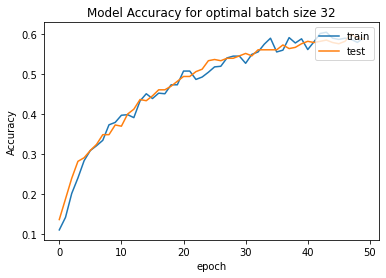

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for optimal batch size '+str(optimal_batch_size))
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## **Question 3**

**Part A**

In [42]:
tf.keras.backend.clear_session()

kf = KFold(n_splits=3)

neurons_list = [8,16,32,64]

history = {}



k_fold = 1

for train_index, val_index in kf.split(X_train):
    X_training, X_val = X_train[train_index], X_train[val_index]
    y_training, y_val = y_train[train_index], y_train[val_index]
    for neuron in neurons_list:
        tf.keras.backend.clear_session()
        model = build_model(10,X_train[0].shape,number_of_hidden_neurons=neuron)
        history[(k_fold,neuron)] = train_model(model,50,X_train,y_train,X_test,y_test,batch_size=optimal_batch_size)
    k_fold+=1

Epoch 1/50
21/21 [==============================] - 1s 29ms/step - loss: 2.5787 - accuracy: 0.1239 - val_loss: 2.4049 - val_accuracy: 0.1667
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 2.3696 - accuracy: 0.1567 - val_loss: 2.2822 - val_accuracy: 0.1970
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 2.2587 - accuracy: 0.1866 - val_loss: 2.1996 - val_accuracy: 0.2273
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 2.1897 - accuracy: 0.1925 - val_loss: 2.1355 - val_accuracy: 0.2364
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 2.1236 - accuracy: 0.2269 - val_loss: 2.0846 - val_accuracy: 0.2545
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 2.0452 - accuracy: 0.2299 - val_loss: 2.0409 - val_accuracy: 0.2697
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 2.0437 - accuracy: 0.2134 - val_loss: 2.0025 - val_accuracy: 0.2727
Epoch 8/50
21/21 [=

In [43]:
history

{(1, 8): <keras.callbacks.History at 0x7f6d74ae8910>,
 (1, 16): <keras.callbacks.History at 0x7f6d74f83310>,
 (1, 32): <keras.callbacks.History at 0x7f6d750b9b10>,
 (1, 64): <keras.callbacks.History at 0x7f6d746cff90>,
 (2, 8): <keras.callbacks.History at 0x7f6d61fa9f10>,
 (2, 16): <keras.callbacks.History at 0x7f6d624c4e50>,
 (2, 32): <keras.callbacks.History at 0x7f6d751dd5d0>,
 (2, 64): <keras.callbacks.History at 0x7f6d62567590>,
 (3, 8): <keras.callbacks.History at 0x7f6d75135fd0>,
 (3, 16): <keras.callbacks.History at 0x7f6d751f8a10>,
 (3, 32): <keras.callbacks.History at 0x7f6d75258910>,
 (3, 64): <keras.callbacks.History at 0x7f6d749b57d0>}

In [44]:
mean_cross_val_accuracy = {}
num_epochs = 50
for neuron in neurons_list:
    mean_cross_val_accuracy[neuron] = []


for neuron in neurons_list:
    for epoch in range(num_epochs):
        sum_for_3_folds = 0
        for kFold in [1,2,3]:
            sum_for_3_folds+=history[(kFold,neuron)].history['val_accuracy'][epoch]
        mean_cross_val_accuracy[neuron].append(sum_for_3_folds/3)


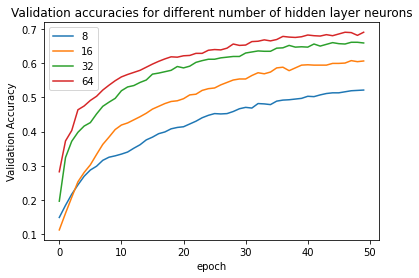

In [45]:
for neuron in neurons_list:
    plt.plot(mean_cross_val_accuracy[neuron])

plt.title('Validation accuracies for different number of hidden layer neurons')
plt.ylabel('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['8', '16', '32', '64'], loc='upper left')

plt.show()

In [46]:
optimal_number_of_neurons = 64

**Part C**

In [48]:
tf.keras.backend.clear_session()
model = build_model(10,X_train[0].shape,number_of_hidden_neurons=optimal_number_of_neurons)
history = train_model(model,50,X_train,y_train,X_test,y_test,batch_size=optimal_batch_size)

Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 2.3916 - accuracy: 0.1597 - val_loss: 2.0192 - val_accuracy: 0.2545
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 1.9207 - accuracy: 0.3060 - val_loss: 1.7502 - val_accuracy: 0.4030
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 1.6691 - accuracy: 0.4328 - val_loss: 1.5983 - val_accuracy: 0.4394
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 1.5162 - accuracy: 0.4657 - val_loss: 1.4926 - val_accuracy: 0.4636
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 1.3859 - accuracy: 0.5090 - val_loss: 1.4080 - val_accuracy: 0.4758
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 1.3338 - accuracy: 0.5239 - val_loss: 1.3510 - val_accuracy: 0.4909
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 1.2135 - accuracy: 0.5776 - val_loss: 1.3088 - val_accuracy: 0.5061
Epoch 8/50
21/21 [=

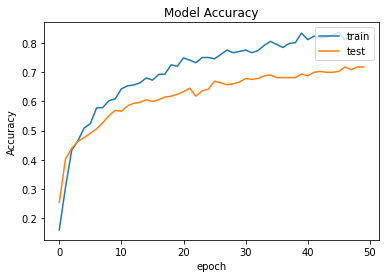

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **Question 4**

**Part A**

In [51]:
tf.keras.backend.clear_session()
model = build_model(10,X_train[0].shape,dropout_probability=0.3,optimizer='adam', number_of_hidden_neurons=optimal_number_of_neurons, number_of_hidden_layers = 2)
history = train_model(model,50,X_train,y_train,X_test,y_test,batch_size=1,callbacks=[])

Epoch 1/50
670/670 [==============================] - 2s 2ms/step - loss: 1.8387 - accuracy: 0.3493 - val_loss: 1.4481 - val_accuracy: 0.4636
Epoch 2/50
670/670 [==============================] - 1s 2ms/step - loss: 1.4198 - accuracy: 0.5045 - val_loss: 1.2546 - val_accuracy: 0.5303
Epoch 3/50
670/670 [==============================] - 1s 2ms/step - loss: 1.1732 - accuracy: 0.5881 - val_loss: 1.1685 - val_accuracy: 0.6030
Epoch 4/50
670/670 [==============================] - 1s 2ms/step - loss: 1.0473 - accuracy: 0.6060 - val_loss: 1.0837 - val_accuracy: 0.6333
Epoch 5/50
670/670 [==============================] - 1s 2ms/step - loss: 0.9415 - accuracy: 0.6896 - val_loss: 1.0329 - val_accuracy: 0.6545
Epoch 6/50
670/670 [==============================] - 1s 2ms/step - loss: 0.8599 - accuracy: 0.7030 - val_loss: 1.0602 - val_accuracy: 0.6394
Epoch 7/50
670/670 [==============================] - 1s 2ms/step - loss: 0.8368 - accuracy: 0.7134 - val_loss: 1.0439 - val_accuracy: 0.6576
Epoch 

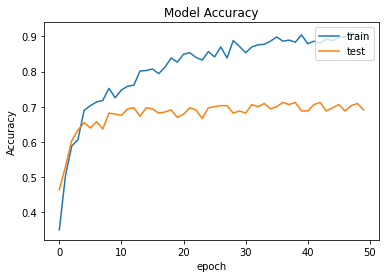

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **Question 5**

In [55]:
tf.keras.backend.clear_session()
history={}
without_dropout_model = build_model(total_classes=10,input_shape=X_train[0].shape, number_of_hidden_neurons=16, number_of_hidden_layers = 1, include_dropout=False)
history=train_model(model=without_dropout_model, epochs=50,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

Epoch 1/50
670/670 [==============================] - 2s 2ms/step - loss: 2.0520 - accuracy: 0.2776 - val_loss: 1.7262 - val_accuracy: 0.4000
Epoch 2/50
670/670 [==============================] - 1s 2ms/step - loss: 1.4210 - accuracy: 0.5358 - val_loss: 1.4422 - val_accuracy: 0.4606
Epoch 3/50
670/670 [==============================] - 1s 2ms/step - loss: 1.1471 - accuracy: 0.6239 - val_loss: 1.3142 - val_accuracy: 0.5152
Epoch 4/50
670/670 [==============================] - 1s 2ms/step - loss: 0.9889 - accuracy: 0.6672 - val_loss: 1.2250 - val_accuracy: 0.5606
Epoch 5/50
670/670 [==============================] - 1s 2ms/step - loss: 0.8836 - accuracy: 0.7090 - val_loss: 1.1761 - val_accuracy: 0.5697
Epoch 6/50
670/670 [==============================] - 1s 2ms/step - loss: 0.7959 - accuracy: 0.7284 - val_loss: 1.1674 - val_accuracy: 0.6030
Epoch 7/50
670/670 [==============================] - 1s 2ms/step - loss: 0.7302 - accuracy: 0.7493 - val_loss: 1.1347 - val_accuracy: 0.6061
Epoch 

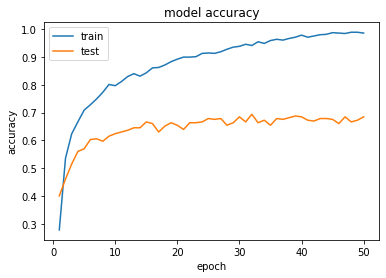

In [56]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


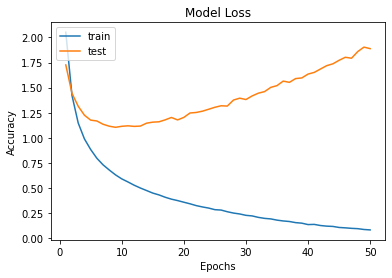

In [57]:
epochs=[x for x in range(1,51)]
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
